#Machine Learning Intro

Question 1: Explain the differences between AI, ML, Deep Learning (DL), and Data
Science (DS).

Answer:

Artificial Intelligence (AI):
Broad field of creating systems that can simulate human intelligence—decision-making, problem-solving, reasoning. Example: Chatbots, self-driving cars.

Machine Learning (ML):
Subset of AI where systems learn from data and improve performance without being explicitly programmed. Example: Spam email detection.

Deep Learning (DL):
Subset of ML using neural networks with many layers to process complex data (images, speech, text). Example: Face recognition on Facebook.

Data Science (DS):
Field that uses statistics, ML, programming, and domain knowledge to extract insights from structured and unstructured data. Example: Predicting customer churn.

Question 2: What are the types of machine learning? Describe each with one
real-world example.

Answer:
There are three main types of machine learning -

 1. Supervised Learning – Model learns from labeled data.
Example: Predicting house prices using past data.

 2. Unsupervised Learning – Model finds hidden patterns in unlabeled data.
Example: Customer segmentation in marketing.

 3. Reinforcement Learning – Model learns by interacting with environment via rewards/penalties.
Example: Training robots to walk.

Question 3: Define overfitting, underfitting, and the bias-variance tradeoff in machine
learning.

Answer:

Overfitting: Model learns noise + patterns, performs well on training but poorly on test data.

Underfitting: Model is too simple, fails to capture patterns, performs poorly on both training & test.

Bias-Variance Tradeoff: Balance between bias (error due to simplifying assumptions) and variance (error due to over-complexity).

Question 4: What are outliers in a dataset, and list three common techniques for
handling them.

Answer:

Outliers: Data points that differ significantly from other observations.

Techniques:
 1. Remove them using IQR/Z-score method.
 2. Cap them using Winsorization.
 3. Transform them using log or square root.

Question 5: Explain the process of handling missing values and mention one
imputation technique for numerical and one for categorical data.

Answer:

Process: Detect → Analyze → Choose method → Impute/remove.

Numerical Data: Mean/median imputation.

Categorical Data: Mode imputation.

Question 6: Write a Python program that:

  ● Creates a synthetic imbalanced dataset with make_classification() from
sklearn.datasets.

● Prints the class distribution.

Answer:

In [27]:
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
x,y = make_classification(n_samples=1000,n_features=2,n_redundant=0,n_clusters_per_class=1,weights=[0.90])
df = pd.DataFrame(y,columns=['target'])
print(f'The class distribution is : \n {df.target.value_counts()}')

The class distribution is : 
 target
0    899
1    101
Name: count, dtype: int64


Question 7: Implement one-hot encoding using pandas for the following list of colors:
['Red', 'Green', 'Blue', 'Green', 'Red']. Print the resulting dataframe.

Answer:  

In [26]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
colors = ['Red', 'Green', 'Blue', 'Green', 'Red']
df_colors = pd.DataFrame(colors , columns = ['colour'])
encoded = encoder.fit_transform(df_colors[['colour']]).toarray()
encoded_df = pd.DataFrame(encoded,columns= encoder.get_feature_names_out())
print(f'The new encoded dataframe is : \n {encoded_df}')

The new encoded dataframe is : 
    colour_Blue  colour_Green  colour_Red
0          0.0           0.0         1.0
1          0.0           1.0         0.0
2          1.0           0.0         0.0
3          0.0           1.0         0.0
4          0.0           0.0         1.0


Question 8: Write a Python script to:
● Generate 1000 samples from a normal distribution.
● Introduce 50 random missing values.
● Fill missing values with the column mean.
 ● Plot a histogram before and after imputation.

Answer:

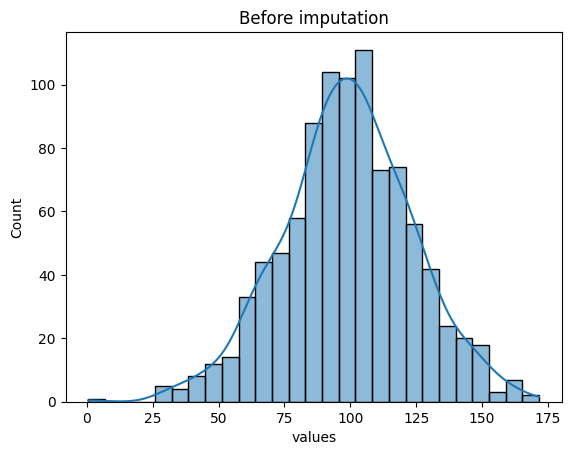

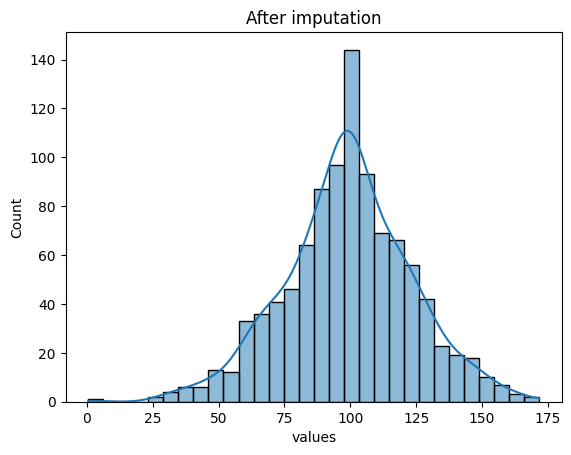

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = np.random.normal(100,25,1000) # generate 1000 sample form normal distribution
df = pd.DataFrame(data,columns=['values'])
# intoduce 50 random missing values
missing_values = np.random.choice(df.index,50,replace=False)
df.loc[missing_values,'values']=np.nan
# plot before imputation
sns.histplot(df['values'],kde =True)
plt.title('Before imputation')
plt.show()
# fill missing values with mean
mean = df['values'].mean()
df['mean_imputaion'] = df['values'].fillna(mean)
# plot after imputation
sns.histplot(df['mean_imputaion'],kde = True)
plt.xlabel('values')
plt.title('After imputation')
plt.show()

Question 9: Implement Min-Max scaling on the following list of numbers [2, 5, 10, 15,
20] using sklearn.preprocessing.MinMaxScaler. Print the scaled array.

Answer:

In [34]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
data =[2, 5, 10, 15, 20]
data = np.array(data)# 1d array
data = data.reshape(-1,1) # creating a 2d array
scaled = minmaxscaler.fit_transform(data)
print(f"the scaled array is : \n {scaled}")

the scaled array is : 
 [[0.        ]
 [0.16666667]
 [0.44444444]
 [0.72222222]
 [1.        ]]


Question 10: You are working as a data scientist for a retail company. You receive a customer
transaction dataset that contains:
● Missing ages,
● Outliers in transaction amount,
● A highly imbalanced target (fraud vs. non-fraud),
● Categorical variables like payment method.
Explain the step-by-step data preparation plan you’d follow before training a machine learning
model. Include how you’d address missing data, outliers, imbalance, and encoding.

Answer:  

As a data scientist, here’s how I would prepare the dataset before training:

- Handle Missing Ages

 - Numerical variable → I can use mean(if there is no outliers) and median(if outliers present), use median imputation (less sensitive to outliers than mean).



- Handle Outliers in Transaction Amount

 - Detect outliers using IQR (Interquartile Range) or Z-score. After detecting the outliers , either i can remove the outliers or i can replace them with mean or mode imputation



- Handle Imbalance in Target (Fraud vs Non-Fraud)

 - Fraud is rare → highly imbalanced dataset.

 - Solutions:

    1.Oversampling minority class → e.g., SMOTE.

    2.Undersampling majority class.

    3.Use class weights in algorithms like Logistic Regression, Random Forest.

- Handle Categorical Variables (Payment Method, etc.)

 - Use One-Hot Encoding for nominal categories.

 - Use Ordinal Encoding if the variable has natural order.

- Final Steps

 - Scale numerical features (e.g., MinMaxScaler or StandardScaler).

 - Split into training and test sets.


In [104]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

encoder = OneHotEncoder()
scaler = StandardScaler()

# Create a sample dataset
data = {
    'customer_id': [101, 102, 103, 104, 105, 106, 107, 108, 109],
    'age': [25, 30, np.nan, 40, 28, np.nan, 50, 60, np.nan],
    'transaction_amount': [100, 210, 150, 3000, 200, 130, 4000, 120, 180],
    'payment_method': ['Card', 'Cash', 'UPI', 'Card', 'UPI', 'Card','Cash', 'UPI', 'Card'],
    'fraud': [0, 0, 0, 1, 0, 0, 0, 1, 1]   # Imbalanced (more 0 than 1)
}
df = pd.DataFrame(data)
print(f"The original dataframe is: \n {df}")



# -----------------------------
# Handle missing ages
df['impute_age'] = df['age'].fillna(df['age'].mean())

# -----------------------------
# Handle outliers in transaction amount
q1 = df['transaction_amount'].quantile(.25)
q3 = df['transaction_amount'].quantile(.75)
iqr = q3 - q1
lower_f = q1 - 1.5*iqr
upper_f = q3 + 1.5*iqr
df['imputed_t_amount'] = np.where(
    (df.transaction_amount <= lower_f) | (df.transaction_amount >= upper_f),
    df['transaction_amount'].median(),
    df['transaction_amount']
)

# imbalance dataset with SMOTE
# Features & target
X = df.drop(columns=['customer_id', 'fraud', 'age', 'transaction_amount', 'payment_method'])
y = df['fraud']
smote = SMOTE(k_neighbors=2, random_state=42)  # we have 3 fraud samples → use k=2
X_res, y_res = smote.fit_resample(X, y)
print("Before:\n", y.value_counts())
print("\nAfter:\n", y_res.value_counts())

# One-hot encode categorical variables
encoded = encoder.fit_transform(df[['payment_method']]).toarray()
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['payment_method']))
cf = pd.concat([df, encoded_df], axis=1)
print(f"The updated dataframe is :\n {cf} ")
#training and testing
scaler.fit_transform(df[['age','transaction_amount',]])
scaler.transform([[40,4000]])


The original dataframe is: 
    customer_id   age  transaction_amount payment_method  fraud
0          101  25.0                 100           Card      0
1          102  30.0                 210           Cash      0
2          103   NaN                 150            UPI      0
3          104  40.0                3000           Card      1
4          105  28.0                 200            UPI      0
5          106   NaN                 130           Card      0
6          107  50.0                4000           Cash      0
7          108  60.0                 120            UPI      1
8          109   NaN                 180           Card      1
Before:
 fraud
0    6
1    3
Name: count, dtype: int64

After:
 fraud
0    6
1    6
Name: count, dtype: int64
The updated dataframe is :
    customer_id   age  ...  payment_method_Cash payment_method_UPI
0          101  25.0  ...                  0.0                0.0
1          102  30.0  ...                  1.0                0.0
2    

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.09219309, 2.1984244 ]])

In [85]:
cf

,customer_id,age,transaction_amount,payment_method,fraud,impute_age,imputed_t_amount,payment_method_Card,payment_method_Cash,payment_method_UPI
0,101,25.0,100,Card,0,25.000000,100.0,1.0,0.0,0.0
1,102,30.0,210,Cash,0,30.000000,210.0,0.0,1.0,0.0
2,103,NaN,150,UPI,0,38.833333,150.0,0.0,0.0,1.0
3,104,40.0,3000,Card,1,40.000000,180.0,1.0,0.0,0.0
4,105,28.0,200,UPI,0,28.000000,200.0,0.0,0.0,1.0
5,106,NaN,130,Card,0,38.833333,130.0,1.0,0.0,0.0
6,107,50.0,4000,Cash,0,50.000000,180.0,0.0,1.0,0.0
7,108,60.0,120,UPI,1,60.000000,120.0,0.0,0.0,1.0
8,109,NaN,180,Card,1,38.833333,180.0,1.0,0.0,0.0
